# Aufgabe 31
## Implementation Gauß-Newton
Verfahren wie in der Vorlesung besprochen, mit der Änderung, dass auch alle Zwischenschritte des Verfahrens mit ausgegeben werden.

In [1]:
from numpy.linalg import lstsq,norm
from numpy import concatenate

def gauss_newton(f,df,x0,tol):
    delta_x = lstsq(df(x0),-f(x0))[0]
    x=x0+delta_x
    all_x=array([x0,x])
    k=1
    
    while True:
        k=k+1
        delta_x_new=lstsq(df(x),-f(x))[0]
        x=x+delta_x_new
        all_x=concatenate((all_x,[x]),axis=0)
        q=norm(delta_x_new)/norm(delta_x)
        if q>=1:
            print('Verfahren scheint nicht zu konvergieren')
            return all_x,k
        if q/(1-q)*norm(delta_x_new)<=tol:
            return all_x,k
        else:
            delta_x=delta_x_new.copy()

## Ellipsen Fit
Wir schreiben zunächst die Funktionen $r_p(t)$ und $D_p r_p(t)$

In [2]:
from numpy import cos,sin,zeros,array,pi,squeeze

# Bestimmung des Radius bei gegebenen Parametern zu einem Zeitpunkt
def radius_single(p,t):
    a=1-p[1]*cos(t-p[2])
    return p[0]/a

# Bestimmung der Jacobimatrix an gegebnen Parmetern zu einem Zeitpunkt
def jacobi_radius_single(p,t):
    J=zeros([1,3])
    t=t-p[2]
    J[0,0]=1./(1-p[1]*cos(t))
    J[0,1]=p[0]*cos(t)/(1-p[1]*cos(t))**2
    J[0,2]=p[0]*p[1]*sin(t)/(1-p[1]*cos(t))**2
    return J

# Auswertung der Radien zu vielen Zeitpunkten bei festen Parametern
def radius(p,T):
    r=[radius_single(p,t) for t in T]
    return squeeze(array(r))

# Auswertung der Jacobimatrix zu vielen Zeitpunkten bei festen Parametern
def jacobi_radius(p,T):
    J=[jacobi_radius_single(p,t) for t in T]
    return squeeze(array(J))

Mit den gegeben Daten können wir daraus nun die Funktionen für unser Gauß-Newton Verfahren erstellen

In [3]:
from numpy import load

l=load('data31.npz')
t_data=l['t']
r_data=l['r']

F= lambda x: radius(x,t_data)-r_data
DF= lambda x: jacobi_radius(x,t_data)

Das Verfahren liefert das folgende Ergebnis:

In [4]:
x0=array([1.,1./2.,0.])
a,k=gauss_newton(F,DF,x0,0.01*norm(r_data))
print('Anzahl benötigter Iterationen: {0}\nIterate:\n{1}'.format(k,a))

Anzahl benötigter Iterationen: 3
Iterate:
[[ 1.          0.5         0.        ]
 [ 0.88970882  0.61388071  0.36853493]
 [ 0.89655494  0.70531879  0.39076027]
 [ 0.89812593  0.71296859  0.38936107]]


Wir plotten nun Daten und die berechneten Ellipsen zusammen mit der wahren Ellipse.

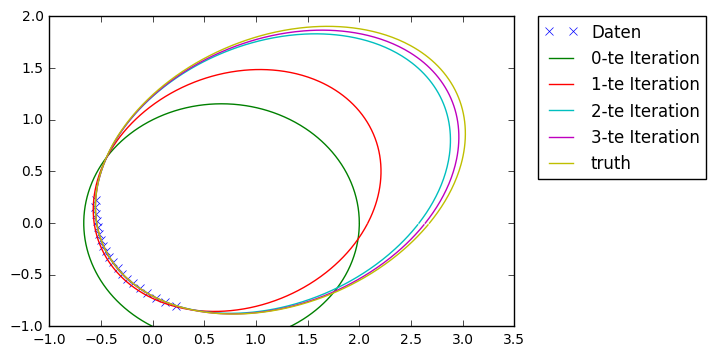

In [5]:
import matplotlib.pyplot as plt
from numpy import arange

def ellipse_coo(p):
    T=arange(1000)*pi/500
    r=radius(p,T)
    x=cos(T)*r
    y=sin(T)*r
    return x,y

x_data=cos(t_data)*r_data
y_data=sin(t_data)*r_data

plt.plot(x_data,y_data,'x',label='Daten')

for j in range(k+1):
    x,y=ellipse_coo(a[j,:])
    plt.plot(x,y,label='{}-te Iteration'.format(j))
    
truth=array([0.9,23./32,pi/8])
x,y=ellipse_coo(truth)
plt.plot(x,y,label='truth')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([-1, 3.5, -1, 2])
plt.gca().set_aspect('equal')
plt.show()


Der folgende Code wurde verwendet um die Daten zu erzeugen.

In [6]:
# from numpy import arange
# from numpy.random import randn

# samples=20
# truth=array([0.9,23./32,pi/8])
# t_data=(arange(samples)/samples)*3*pi/4+7/8*pi
# r_data=radius(truth,t_data)

# e=randn(samples)
# r_data=0.01*e*r_data+r_data

# from numpy import savez
# savez('data31.npz',t=t_data,r=r_data)